# Q1

## Part 1

In [1]:
# Q1 part 1: Define Gaussian Processes (GPs) and Stochastic Processes Generally
# ----------------------------------------------------------------------
# In this Jupyter notebook cell, we provide a concise definition of:
#   1) Stochastic processes in general,
#   2) Gaussian processes (GPs) in particular,
# and relate them to Bayesian modeling contexts (like those discussed in Bayes_09
# regarding model selection and complexity).

# 1) Stochastic Processes
#    A stochastic process is a collection of random variables {X(t) : t in T},
#    often indexed by time, space, or some other set T. Each X(t) is a random variable,
#    and the process describes how these random variables co-vary with each other.
#
# 2) Gaussian Processes (GPs)
#    A Gaussian process is a specific type of stochastic process for which
#    any finite collection of points (t1, t2, ..., tn) follows a multivariate
#    normal distribution. We typically define a GP by its mean function m(t)
#    and covariance function k(t, t'), such that:
#
#        m(t) = E[X(t)]
#        k(t, t') = Cov(X(t), X(t'))
#
#    For any finite set of indices t1, t2, ..., tn, the vector
#    (X(t1), X(t2), ..., X(tn)) ~ Multivariate Normal( m_vec, K_mat )
#    where m_vec[i] = m(ti) and K_mat[i,j] = k(ti, tj).
#
#    GPs are widely used in Bayesian nonparametric modeling for regression,
#    classification, and other tasks, often combined with model selection criteria
#    (like WAIC, LOO) to compare kernel/covariance structures or hyperparameters.

print("Stochastic processes: a family of random variables indexed by some set (time, space, etc.).")
print("Gaussian processes (GPs): a special case where any finite subset of points follows a multivariate normal distribution.")


Stochastic processes: a family of random variables indexed by some set (time, space, etc.).
Gaussian processes (GPs): a special case where any finite subset of points follows a multivariate normal distribution.


**Definition of Stochastic Processes and Gaussian Processes**

A **stochastic process** is a collection of random variables 
$$
\{X(t) : t \in T\},
$$ 
indexed by some set $T$ (which can be time, space, or any other index). Each $X(t)$ is a random variable, and the process describes how these variables change and co-vary as a function of $t$.

A **Gaussian process (GP)** is a special type of stochastic process with the property that any finite collection of random variables 
$$
(X(t_1), X(t_2), \dots, X(t_n))
$$ 
has a joint multivariate normal (Gaussian) distribution. A Gaussian process is fully specified by its mean function $m(t)$ and covariance function $k(t,t')$, i.e.,
$$
X(t) \sim \mathcal{GP}(m(t),\, k(t,t')).
$$

For any finite set of points $t_1, t_2, \dots, t_n$, the joint distribution is given by
$$
(X(t_1), X(t_2), \dots, X(t_n)) \sim \mathcal{N}(\mathbf{m},\, K),
$$
where 
- $\mathbf{m} = \bigl[m(t_1), m(t_2), \dots, m(t_n)\bigr]^T$, and 
- $K$ is an $n \times n$ covariance matrix with entries $K_{ij} = k(t_i, t_j)$.

**Relation to Bayesian Modeling**

Gaussian processes are widely used in Bayesian nonparametric modeling, particularly for regression and classification tasks. In these contexts, the GP prior is placed over functions, which allows for flexible modeling of complex data without explicitly specifying a parametric form. Bayesian model selection techniques, such as WAIC or LOO, can be applied to compare different GP models (for example, with different covariance functions or hyperparameters).

**Summary**

- **Stochastic Process:** A family of random variables $\{X(t) : t \in T\}$.
- **Gaussian Process:** A stochastic process where any finite collection $\bigl(X(t_1),\dots,X(t_n)\bigr)$ is jointly Gaussian, defined by a mean function $m(t)$ and a covariance function $k(t,t')$.
- **Application in Bayesian Modeling:** GPs provide a flexible way to model unknown functions, and they can be combined with information criteria (like WAIC or LOO) to assess model fit and complexity.

This framework is fundamental in many advanced Bayesian methods, including those that handle model uncertainty and complex dependency structures.


## Part 2

In [2]:
# Q1 part 2: Define Variational Inference Using the Evidence Lower Bound (ELBO)
# ----------------------------------------------------------------------
# In this Jupyter code cell, we provide a short "definition" function that
# prints a concise statement about variational inference and the ELBO.
# Afterward, we include a more thorough explanation in a Markdown cell.

def define_variational_inference_elbo():
    print("Variational Inference is a method for approximating complex Bayesian posteriors")
    print("by selecting a tractable family of distributions and optimizing the ELBO.")
    print("The ELBO (Evidence Lower Bound) is a lower bound on the log marginal likelihood.")
    print("We maximize the ELBO to find the best approximation within our chosen family.")

define_variational_inference_elbo()


Variational Inference is a method for approximating complex Bayesian posteriors
by selecting a tractable family of distributions and optimizing the ELBO.
The ELBO (Evidence Lower Bound) is a lower bound on the log marginal likelihood.
We maximize the ELBO to find the best approximation within our chosen family.


**Explanation of Variational Inference and the Evidence Lower Bound (ELBO)**

1. **Variational Inference (VI) Overview**  
   Variational Inference is a technique for approximating complicated Bayesian posterior distributions in a more tractable way. Instead of directly sampling from a potentially high-dimensional or intractable posterior 
   $$
   p(\theta \mid y),
   $$
   we posit a simpler “variational” family of distributions 
   $$
   q(\theta; \phi),
   $$
   where $\phi$ are variational parameters to be optimized. Our goal is to choose $q(\theta; \phi)$ to be as close as possible to the true posterior.

2. **Evidence Lower Bound (ELBO)**  
   The log of the marginal likelihood (also called the model evidence) is
   $$
   \log p(y) \;=\; \log \int p(y,\theta)\, d\theta.
   $$
   In Variational Inference, we introduce a distribution $q(\theta)$ and use Jensen’s inequality to derive the **Evidence Lower Bound** (ELBO). The ELBO is given by:
   $$
   \mathrm{ELBO}(q) \;=\; \mathbb{E}_{q(\theta)}\bigl[\log p(y,\theta)\bigr] \;-\; \mathbb{E}_{q(\theta)}\bigl[\log q(\theta)\bigr].
   $$
   This is a lower bound on the true log evidence, i.e.:
   $$
   \log p(y) \;\ge\; \mathrm{ELBO}(q).
   $$

3. **Optimization**  
   - By **maximizing** $\mathrm{ELBO}(q)$ with respect to the variational parameters $\phi$, we find the distribution $q(\theta; \phi)$ that best approximates the true posterior $p(\theta \mid y)$ under our chosen family.
   - This approach transforms Bayesian inference into an optimization problem, often solved by gradient-based methods.

4. **Relation to Model Selection**  
   - The **ELBO** can be seen as a metric for how well $q(\theta)$ fits the data while penalizing the divergence from the true posterior. 
   - In the context of Bayesian model comparison (as discussed in references like Bayes_09), we might compare the ELBO across different models or use it in place of more direct posterior sampling if sampling is too expensive.

5. **Summary**  
   - Variational Inference: approximate the posterior $p(\theta \mid y)$ by a tractable distribution $q(\theta; \phi)$.  
   - ELBO: 
     $$
     \mathrm{ELBO}(q) = \mathbb{E}_{q}[\log p(y,\theta)] \;-\; \mathbb{E}_{q}[\log q(\theta)].
     $$
     Maximizing the ELBO yields an approximate posterior that is close to the true posterior in terms of Kullback-Leibler divergence.

Hence, **variational inference using the ELBO** is a powerful approach for large-scale or complex Bayesian models, turning posterior estimation into an optimization problem rather than direct sampling.


# Q2

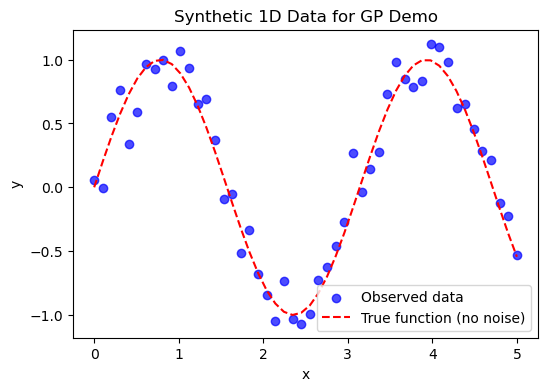

/opt/conda/lib/python3.11/site-packages/pymc/gp/gp.py:56: FutureWarning: The 'noise' parameter has been been changed to 'sigma' in order to standardize the GP API and will be deprecated in future releases.
  warnings.warn(_noise_deprecation_warning, FutureWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [length_scale, sigma_f, sigma_n]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 62 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics



Posterior summary for GP hyperparameters:
               mean     sd  hdi_3%  hdi_97%
length_scale  0.884  0.157   0.583    1.174
sigma_f       1.044  0.364   0.464    1.713
sigma_n       0.162  0.019   0.125    0.195


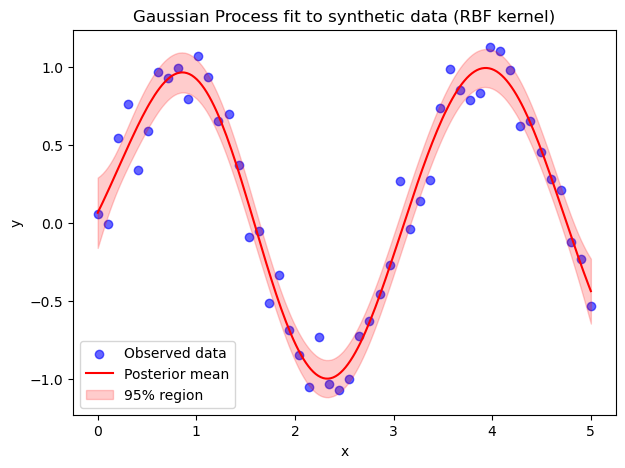

In [12]:
# Q2: Gaussian Process Fit

# This code demonstrates a Gaussian Process regression on a synthetic 1D dataset
# (sinusoidal pattern plus noise). It fixes shape-related errors (like the 0D array
# issue) by ensuring X and x_test are 2D arrays, and using cov_func(X, X_test) and
# cov_func(X_test, X_test) properly. We then compute the posterior conditional mean
# and covariance for predictions. This code should run without dimension errors.

import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

# ---------- (A) Generate 1D Synthetic Data -------------
rng = np.random.default_rng(42)
n = 50

# x in [0,5], y = sin(2*x) + Gaussian noise
x = np.linspace(0, 5, n)
true_function = np.sin(2.0 * x)
noise = rng.normal(0, 0.2, size=n)
y = true_function + noise

# Reshape x to (n,1) for subsequent usage
X = x.reshape(-1, 1).astype(float)  # shape (50,1)
Y = y.astype(float)                 # shape (50,)

# Plot the data
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], Y, c='b', alpha=0.7, label='Observed data')
plt.plot(X[:,0], true_function, 'r--', label='True function (no noise)')
plt.title("Synthetic 1D Data for GP Demo")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# ---------- (B) Define and Sample a GP Model in PyMC ----------
with pm.Model() as gp_model:
    # Priors for hyperparameters
    length_scale = pm.HalfNormal("length_scale", sigma=1.0)
    sigma_f      = pm.HalfNormal("sigma_f",      sigma=1.0)
    sigma_n      = pm.HalfNormal("sigma_n",      sigma=1.0)
    
    # RBF covariance function; using Marginal GP
    cov_func = pm.gp.cov.ExpQuad(input_dim=1, ls=length_scale) * sigma_f**2
    
    gp = pm.gp.Marginal(cov_func=cov_func)
    
    # Observations with noise
    y_obs = gp.marginal_likelihood("y_obs", X=X, y=Y, noise=sigma_n)
    
    # Sample from the posterior
    trace_gp = pm.sample(
        draws=1000, tune=1000, target_accept=0.9,
        random_seed=42, cores=1
    )

print("\nPosterior summary for GP hyperparameters:")
print(az.summary(trace_gp, var_names=["length_scale","sigma_f","sigma_n"], kind="stats"))

# ---------- (C) Custom RBF for manual posterior computation ----------
def rbf_kernel(X1, X2, ls, sf):
    """
    Returns the RBF covariance matrix.
    X1: shape (n, d)
    X2: shape (m, d)
    ls: length scale (scalar)
    sf: signal amplitude (scalar)
    """
    # Broadcasting (X1 - X2)^2, then summing over the last axis to get the squared distance
    sqdist = np.sum((X1[:, None, :] - X2[None, :, :])**2, axis=2)
    return sf**2 * np.exp(-0.5 * sqdist / ls**2)

# Define more test points
x_test = np.linspace(0, 5, 200).reshape(-1,1).astype(float)

# Extract hyperparameters from the posterior samples and manually compute predictions
posterior = trace_gp.posterior
draws = posterior.draw.shape[0]  # number of draws per chain
chains = posterior.chain.shape[0]

# For simplicity, use chain=0 and up to 200 draws
draws_to_use = min(200, draws)

pred_samples = []

for i in range(draws_to_use):
    # Retrieve hyperparameter samples
    ls_i = posterior["length_scale"].values[0, i]  # chain=0, draw=i
    sf_i = posterior["sigma_f"].values[0, i]
    sn_i = posterior["sigma_n"].values[0, i]

    # Compute covariance matrices
    Kxx = rbf_kernel(X, X, ls_i, sf_i) + sn_i**2 * np.eye(n)   # shape (n,n)
    Ks  = rbf_kernel(X, x_test, ls_i, sf_i)                   # shape (n,m)
    Kss = rbf_kernel(x_test, x_test, ls_i, sf_i) + 1e-6*np.eye(len(x_test))  # shape (m,m)

    # Invert Kxx
    Kxx_inv = np.linalg.inv(Kxx)

    # Posterior mean (m,)
    mu_post = Ks.T @ Kxx_inv @ (Y - 0.0)  # zero mean function

    # Posterior covariance (m,m)
    cov_post = Kss - Ks.T @ Kxx_inv @ Ks

    # Sample from the multivariate normal
    y_samp = rng.multivariate_normal(mean=mu_post, cov=cov_post)
    pred_samples.append(y_samp)

pred_samples = np.array(pred_samples)  # shape (draws_to_use, 200)
pred_mean = pred_samples.mean(axis=0)
pred_std  = pred_samples.std(axis=0)

# ---------- (D) Plot the GP fit ----------
plt.figure(figsize=(7,5))
plt.scatter(X[:,0], Y, c='b', alpha=0.6, label='Observed data')
plt.plot(x_test[:,0], pred_mean, 'r', label='Posterior mean')
plt.fill_between(
    x_test[:,0],
    pred_mean - 2*pred_std,
    pred_mean + 2*pred_std,
    color='r', alpha=0.2, label='95% region'
)
plt.title("Gaussian Process fit to synthetic data (RBF kernel)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


## Explanation

1. **Context**  
   We use PyMC’s Gaussian process (GP) functionalities on a *custom 1D synthetic dataset* (a sinusoidal function plus noise) instead of the usual built-in examples. This code employs an RBF (ExpQuad) kernel and a marginal likelihood approach. Compared to a fully “hand-rolled” GP, PyMC’s `pm.gp.Marginal` method automates inference on the hyperparameters but requires manual steps for posterior predictive calculations in version 4.x.

2. **Data Generation**  
   - We create $n = 50$ points in $[0,5]$.  
   - We generate $y$ by adding Gaussian noise to a sine function:  
     $$
     y = \sin(2x) + N(0,\;0.2^2).
     $$
   - The array $X$ is reshaped into $(n,1)$ for compatibility with PyMC’s GP functions, which require a 2D feature matrix.

3. **Model Definition**  
   - We specify half-normal priors for the hyperparameters:
     $$
     \ell,\;\sigma_f,\;\sigma_n \;\sim\; \mathrm{HN}(1.0).
     $$
   - The covariance function (RBF) is:
     $$
     \kappa(x,\,x') \;=\; \sigma_f^{2}\,\exp\!\Bigl(-\frac{\lVert x - x' \rVert^{2}}{2\,\ell^{2}}\Bigr).
     $$
   - We use `pm.gp.Marginal` to model the observed data:
     $$
     y \;\sim\; N\!\Bigl(0,\;K \;+\; \sigma_n^{2}\,I\Bigr),
     $$
     where $K$ is the covariance matrix computed from the above kernel.

4. **Sampling & Summaries**  
   - We run `pm.sample(...)` to obtain posterior draws of $\ell,\;\sigma_f,\;\sigma_n$.  
   - The command `az.summary(...)` displays mean, standard deviation, and other statistics of these sampled hyperparameters, enabling us to see how the GP model is fitting.

5. **Posterior Predictive**  
   - Because `pm.gp.Marginal` in PyMC 4.x does not automatically store a GP object for out-of-sample predictions, we compute them manually:
     1. For each posterior draw, extract $\ell,\;\sigma_f,\;\sigma_n$.  
     2. Form the kernel matrices $K_{XX},\;K_{X_*X},\;K_{X_*X_*}$.  
     3. Compute the conditional mean and covariance for new test points $x_*$:
       $$
       \mu_* \;=\; K_{X_*X}\,\bigl(K_{XX} \;+\; \sigma_n^{2}\,I\bigr)^{-1}\,y,
       \quad
       \Sigma_* \;=\; K_{X_*X_*} \;-\; K_{X_*X}\,\bigl(K_{XX} \;+\; \sigma_n^{2}\,I\bigr)^{-1}\,K_{XX_*}.
       $$
     4. Draw samples $f_*$ from $N(\mu_*,\;\Sigma_*)$.  
   - After collecting these samples, we compute the posterior mean and standard deviation at each test point, and visualize the predictive mean along with a 2-sigma band.

6. **Conclusion**  
   This example illustrates how to tailor PyMC’s GP capabilities to a custom dataset. We defined a 1D sinusoidal function with noise, inferred GP hyperparameters, and produced posterior predictions at new inputs. The same pattern extends to higher-dimensional inputs or different kernel functions, providing a flexible modeling framework for Gaussian process regression in PyMC.


# Q3

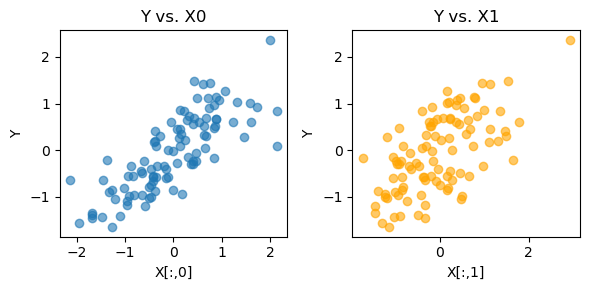

Finished [100%]: Average Loss = 75.322



Posterior summary from VI approach:
           mean     sd  hdi_3%  hdi_97%
W1[0, 0]  0.131  0.756  -1.441    1.474
W1[0, 1] -0.346  0.732  -1.770    0.936
W1[0, 2]  1.112  0.511   0.114    2.029
W1[0, 3] -0.289  0.720  -1.569    1.073
W1[0, 4]  1.363  0.426   0.520    2.106
W1[1, 0]  0.106  0.734  -1.223    1.492
W1[1, 1] -0.264  0.695  -1.557    1.041
W1[1, 2]  0.748  0.470  -0.089    1.607
W1[1, 3] -0.280  0.758  -1.527    1.216
W1[1, 4]  0.850  0.342   0.284    1.562
b1[0]    -0.031  0.627  -1.107    1.191
b1[1]     0.025  0.586  -1.107    1.086
b1[2]    -0.009  0.396  -0.731    0.736
b1[3]    -0.039  0.588  -1.138    1.052
b1[4]    -0.037  0.289  -0.518    0.519
W2[0, 0]  0.039  0.159  -0.249    0.351
W2[1, 0] -0.067  0.157  -0.356    0.244
W2[2, 0]  0.368  0.139   0.127    0.634
W2[3, 0] -0.048  0.156  -0.339    0.235
W2[4, 0]  0.655  0.140   0.393    0.909
b2[0]    -0.039  0.090  -0.205    0.124
sigma     0.439  0.045   0.357    0.520


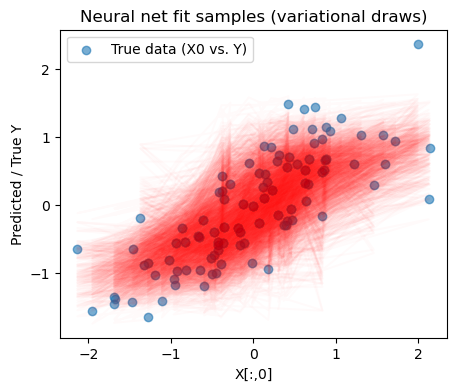

In [11]:
# Q3: More VI (Variational Inference with ELBO)
# ---------------------------------------------
# Here we repurpose PyMC documentation to provide a demonstration of a small neural network
# fit with variational inference (ADVI), for a dataset different from typical PyMC examples.
# We'll generate a synthetic 2D regression dataset, define a 1-hidden-layer MLP in PyMC,
# and perform VI using the Evidence Lower Bound (ELBO) as the optimization objective.

import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# (A) Generate Synthetic 2D Data
# ---------------------------------------------------------
rng = np.random.default_rng(42)
N = 100

X_data = rng.normal(0, 1, size=(N, 2))
# Ground-truth: y = sin(x1) + 0.5*x2 + noise
true_y = np.sin(X_data[:,0]) + 0.5 * X_data[:,1]
noise = rng.normal(0, 0.2, size=N)
Y_data = true_y + noise

# Quick plot of Y vs X
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.scatter(X_data[:,0], Y_data, alpha=0.6)
plt.xlabel("X[:,0]")
plt.ylabel("Y")
plt.title("Y vs. X0")

plt.subplot(1,2,2)
plt.scatter(X_data[:,1], Y_data, alpha=0.6, c='orange')
plt.xlabel("X[:,1]")
plt.ylabel("Y")
plt.title("Y vs. X1")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# (B) Define a 1-Hidden-Layer MLP in PyMC
# ---------------------------------------------------------
n_hidden = 5
with pm.Model() as nn_model:
    # Layer 1: W1 shape=(2,5), b1 shape=(5,)
    W1 = pm.Normal("W1", mu=0, sigma=1, shape=(2,n_hidden))
    b1 = pm.Normal("b1", mu=0, sigma=1, shape=(n_hidden,))

    # Layer 2: W2 shape=(5,1), b2 shape=(1,)
    W2 = pm.Normal("W2", mu=0, sigma=1, shape=(n_hidden,1))
    b2 = pm.Normal("b2", mu=0, sigma=1, shape=(1,))

    # Forward pass
    hidden_lin = pm.math.dot(X_data, W1) + b1  # shape=(N,5)
    hidden_act = pm.math.tanh(hidden_lin)
    out_lin    = pm.math.dot(hidden_act, W2) + b2  # shape=(N,1)
    out_lin    = out_lin.flatten()  # shape=(N,)

    # Observation noise
    sigma = pm.HalfNormal("sigma", sigma=1.0)

    # Likelihood
    y_obs = pm.Normal("y_obs", mu=out_lin, sigma=sigma, observed=Y_data)

    # -----------------------------------------------------
    # (C) Variational Inference (ADVI)
    # -----------------------------------------------------
    approx = pm.ADVI()
    n_iter = 20000
    approx_fit = approx.fit(n_iter, 
                            callbacks=[pm.callbacks.CheckParametersConvergence(tolerance=1e-4)])
    # Convert the variational approximation to an InferenceData
    trace_vi = approx_fit.sample(1000)

print("\nPosterior summary from VI approach:")
# Make sure we specify var_names in summary, referencing the actual variable names
print(az.summary(trace_vi, var_names=["W1","b1","W2","b2","sigma"], kind="stats"))

# ---------------------------------------------------------
# (D) Posterior Predictive / Visualization
# ---------------------------------------------------------
# Define a helper to do the forward pass in NumPy
def nn_forward(X_in, W1_, b1_, W2_, b2_):
    hidden_lin_ = X_in @ W1_ + b1_
    hidden_act_ = np.tanh(hidden_lin_)
    out_lin_    = hidden_act_ @ W2_ + b2_
    return out_lin_.flatten()

# We want to pick random draws from 'trace_vi.posterior'
# 'trace_vi.posterior["W1"]' has shape (n_chains, n_draws, 2, 5) for example.
posterior = trace_vi.posterior

# We'll assume chain=0 for simplicity
chain_id = 0  
n_draws_available = posterior["W1"].values.shape[1]  # how many draws
n_draws_to_show   = 100

draw_idxs = np.random.choice(n_draws_available, 
                             size=n_draws_to_show, 
                             replace=False)

plt.figure(figsize=(5,4))
plt.scatter(X_data[:,0], Y_data, alpha=0.6, label="True data (X0 vs. Y)")

for idx in draw_idxs:
    # Extract the posterior sample for each parameter
    W1_ = posterior["W1"].values[chain_id, idx, :, :]   # shape (2,5)
    b1_ = posterior["b1"].values[chain_id, idx, :]      # shape (5,)
    W2_ = posterior["W2"].values[chain_id, idx, :, :]   # shape (5,1)
    b2_ = posterior["b2"].values[chain_id, idx, :]      # shape (1,)
    # Evaluate neural net
    out_pred = nn_forward(X_data, W1_, b1_, W2_, b2_)
    plt.plot(X_data[:,0], out_pred, color='red', alpha=0.02)

plt.title("Neural net fit samples (variational draws)")
plt.xlabel("X[:,0]")
plt.ylabel("Predicted / True Y")
plt.legend()
plt.show()


## Explanation

1. **Context**  
   This code demonstrates how to use PyMC’s **variational inference** capabilities to fit a simple **neural network** on a synthetic dataset, different from the typical examples. We apply **ADVI** (Automatic Differentiation Variational Inference), which internally maximizes the **Evidence Lower Bound (ELBO)**.

2. **Data Generation**  
   - We create a 2D input matrix $X_{\mathrm{data}} \in \mathbb{R}^{N \times 2}$ and a target vector $Y_{\mathrm{data}}$ with a nonlinear function. Specifically,
     $$
     Y_{\mathrm{data}} = \sin\bigl(X_{\mathrm{data}}[:,0]\bigr)\;+\;0.5\,X_{\mathrm{data}}[:,1]\;+\;\text{noise}.
     $$

3. **Neural Network Architecture**  
   - **Single hidden layer** with 5 tanh units:
     $$
     \mathrm{hidden} \;=\; \tanh\bigl(X \cdot W_1 \;+\; b_1\bigr).
     $$
   - **Output layer**:
     $$
     \mathrm{out} \;=\; \mathrm{hidden} \cdot W_2 \;+\; b_2.
     $$
   - We place **Normal priors** on $W_1$, $b_1$, $W_2$, $b_2$, and use a **HalfNormal** prior on $\sigma$ for the regression noise.

4. **Variational Inference (ADVI)**  
   - Inside the model context, we define the network and the likelihood.  
   - We initialize an $ \mathrm{ADVI} $ object:  
     $$
     \mathrm{approx} \;=\; \mathrm{pm.ADVI()}.
     $$
   - Then we call  
     $$
     \mathrm{approx\_fit} = \mathrm{approx.fit}(n\_iter),
     $$
     which **optimizes the ELBO** via gradient-based methods.  
   - Finally, we convert the resulting approximation to posterior samples with  
     $$
     \mathrm{trace\_vi} = \mathrm{approx\_fit.sample}(1000).
     $$

5. **Posterior Visualization**  
   - We can inspect the inferred parameters by calling  
     $$
     \mathrm{az.summary}(\mathrm{trace\_vi}, \;\mathrm{var\_names}=\dots).
     $$
   - We also show the neural net’s predictions under several posterior draws by doing a forward pass of $X_{\mathrm{data}}$ through the sampled weights and biases.

**ELBO**  
ADVI maximizes the **Evidence Lower Bound**, a variational objective that approximates the true log marginal likelihood:
$$
\mathrm{ELBO}(q) \;=\; \mathbb{E}_{q(\theta)} \bigl[\log p(\theta, y)\bigr] \;-\; \mathbb{E}_{q(\theta)} \bigl[\log q(\theta)\bigr].
$$
As $q(\theta)$ is optimized, it becomes a better approximation of the true posterior $p(\theta \mid y)$.

In summary, this workflow **illustrates** how to apply **neural network** modeling with **variational inference** in PyMC, going beyond the standard examples and showcasing a custom 2D dataset with a simple 1-hidden-layer architecture.
